# 🎯 XP Level Progression Analysis - So Sánh 3 Công Thức
 
**Công thức 1 (Linear):** `level × 150 - 50`

**Công thức 2 (Exponential):** `100 × 1.3^(level-1)`

**Công thức 3 (Quadratic):** `50 × level² + 50`

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)
plt.rcParams['font.size'] = 10


## 📊 Định nghĩa 3 Công Thức


In [3]:
def calculate_linear(level):
    return level * 150 - 50

def calculate_exponential(level):
    return int(100 * (1.3 ** (level - 1)))

def calculate_quadratic(level):
    return 50 * level ** 2 + 50

def calculate_total_xp(formula_func, max_level):
    return sum(formula_func(l) for l in range(1, max_level + 1))

# Tạo dữ liệu

In [4]:
levels = np.arange(1, 21)

xp_linear = np.array([calculate_linear(l) for l in levels])
total_linear = np.array([calculate_total_xp(calculate_linear, l) for l in levels])
increase_linear = np.concatenate([[0], np.diff(xp_linear)])
percent_linear = np.concatenate([[0], np.diff(xp_linear) / xp_linear[:-1] * 100])

xp_exp = np.array([calculate_exponential(l) for l in levels])
total_exp = np.array([calculate_total_xp(calculate_exponential, l) for l in levels])
increase_exp = np.concatenate([[0], np.diff(xp_exp)])
percent_exp = np.concatenate([[0], np.diff(xp_exp) / xp_exp[:-1] * 100])

xp_quad = np.array([calculate_quadratic(l) for l in levels])
total_quad = np.array([calculate_total_xp(calculate_quadratic, l) for l in levels])
increase_quad = np.concatenate([[0], np.diff(xp_quad)])
percent_quad = np.concatenate([[0], np.diff(xp_quad) / xp_quad[:-1] * 100])

print("📊 SO SÁNH 3 CÔNG THỨC")
print("="*80)
print(f"{'Lv':<4} {'Linear':<12} {'Exponential':<15} {'Quadratic':<12} | {'T.Linear':<12} {'T.Exp':<15} {'T.Quad':<12}")
print("-"*80)
for i in range(len(levels)):
    print(f"{levels[i]:<4} {xp_linear[i]:<12,.0f} {xp_exp[i]:<15,.0f} {xp_quad[i]:<12,.0f} | {total_linear[i]:<12,.0f} {total_exp[i]:<15,.0f} {total_quad[i]:<12,.0f}")

print(f"\n🎯 TỔNG XP ĐẾN LV20:")
print(f"  Linear:       {total_linear[-1]:>12,.0f} XP")
print(f"  Exponential:  {total_exp[-1]:>12,.0f} XP")
print(f"  Quadratic:    {total_quad[-1]:>12,.0f} XP")

📊 SO SÁNH 3 CÔNG THỨC
Lv   Linear       Exponential     Quadratic    | T.Linear     T.Exp           T.Quad      
--------------------------------------------------------------------------------
1    100          100             100          | 100          100             100         
2    250          130             250          | 350          230             350         
3    400          169             500          | 750          399             850         
4    550          219             850          | 1,300        618             1,700       
5    700          285             1,300        | 2,000        903             3,000       
6    850          371             1,850        | 2,850        1,274           4,850       
7    1,000        482             2,500        | 3,850        1,756           7,350       
8    1,150        627             3,250        | 5,000        2,383           10,600      
9    1,300        815             4,100        | 6,300        3,198           


# 📊 BIỂU ĐỒ 1: XP Cần Thiết Theo Level

C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127918 (\N{VIDEO GAME}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


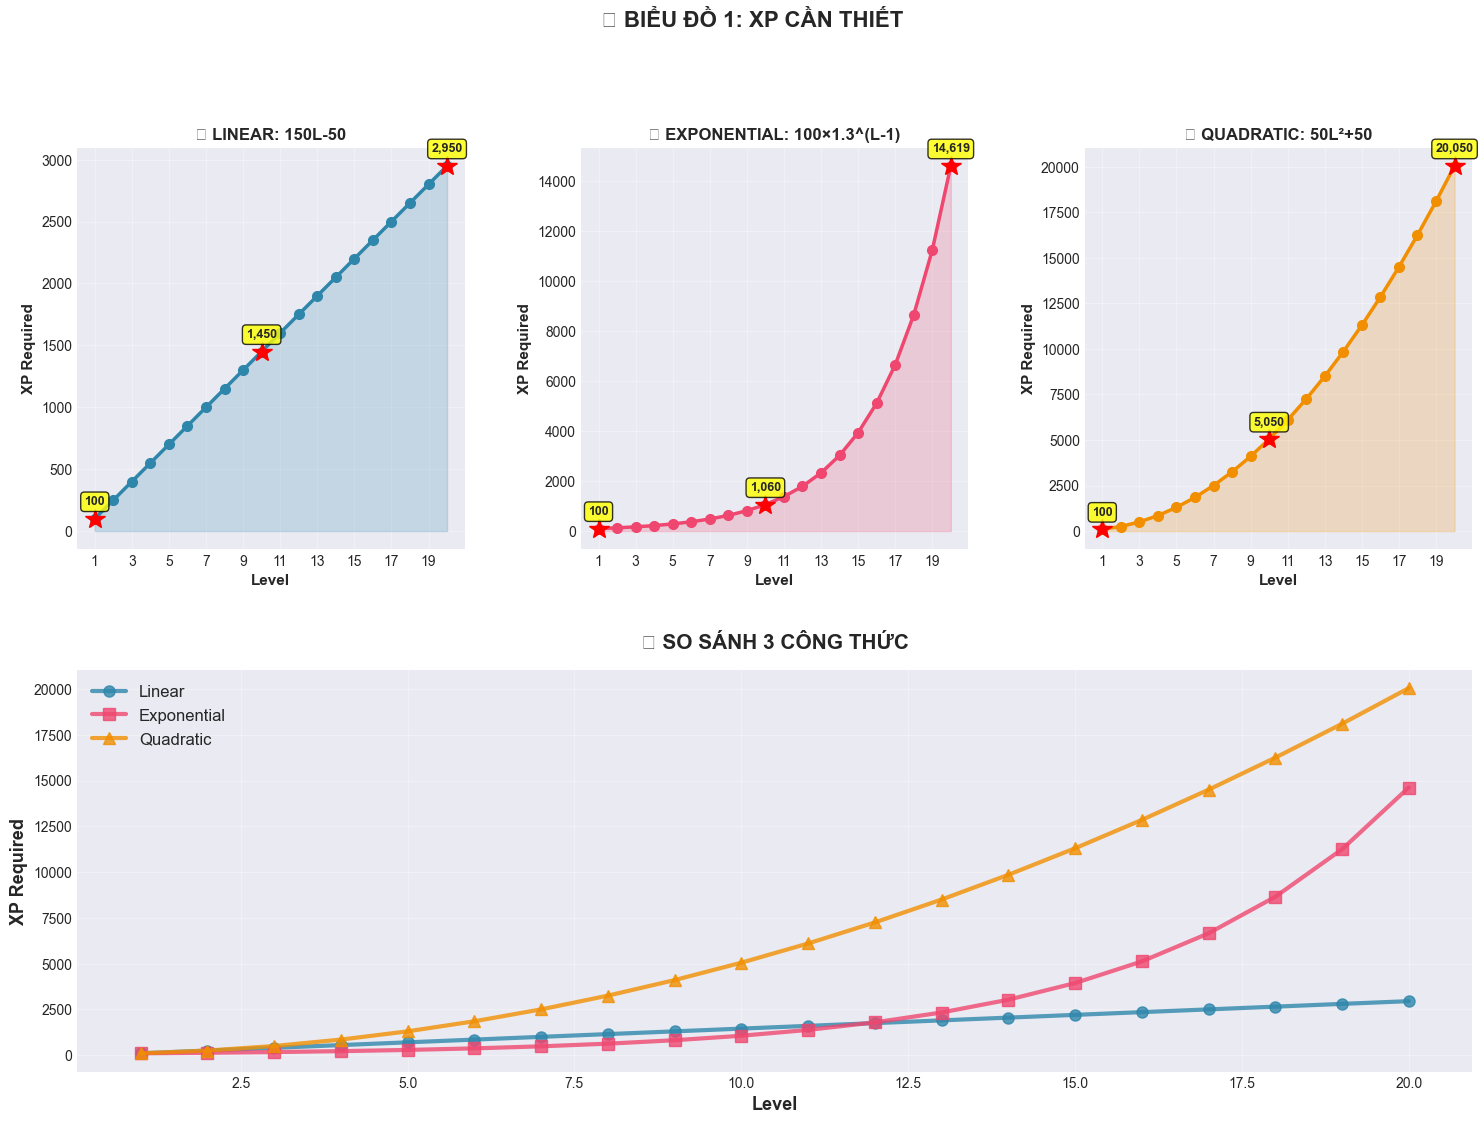

In [5]:
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

colors = ['#2E86AB', '#EF476F', '#F18F01']
formulas = [
    ('LINEAR: 150L-50', xp_linear, colors[0]),
    ('EXPONENTIAL: 100×1.3^(L-1)', xp_exp, colors[1]),
    ('QUADRATIC: 50L²+50', xp_quad, colors[2])
]

for idx, (title, data, color) in enumerate(formulas):
    ax = fig.add_subplot(gs[0, idx])
    ax.plot(levels, data, marker='o', linewidth=2.5, markersize=7, color=color)
    ax.fill_between(levels, data, alpha=0.2, color=color)
    
    for level in [1, 10, 20]:
        i = level - 1
        ax.plot(level, data[i], 'r*', markersize=15)
        ax.annotate(f'{data[i]:,.0f}', xy=(level, data[i]), xytext=(0, 10),
                   textcoords='offset points', ha='center', fontsize=9, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.8))
    
    ax.set_xlabel('Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('XP Required', fontsize=11, fontweight='bold')
    ax.set_title(f'🎯 {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(1, 21, 2))

ax_compare = fig.add_subplot(gs[1, :])
ax_compare.plot(levels, xp_linear, marker='o', linewidth=3, markersize=8, 
               color=colors[0], label='Linear', alpha=0.8)
ax_compare.plot(levels, xp_exp, marker='s', linewidth=3, markersize=8,
               color=colors[1], label='Exponential', alpha=0.8)
ax_compare.plot(levels, xp_quad, marker='^', linewidth=3, markersize=8,
               color=colors[2], label='Quadratic', alpha=0.8)

ax_compare.set_xlabel('Level', fontsize=13, fontweight='bold')
ax_compare.set_ylabel('XP Required', fontsize=13, fontweight='bold')
ax_compare.set_title('📊 SO SÁNH 3 CÔNG THỨC', fontsize=15, fontweight='bold', pad=15)
ax_compare.legend(fontsize=12, loc='upper left')
ax_compare.grid(True, alpha=0.3)

plt.suptitle('🎮 BIỂU ĐỒ 1: XP CẦN THIẾT', fontsize=16, fontweight='bold', y=0.995)
plt.show()


# 📊 BIỂU ĐỒ 2: Tổng XP Tích Lũy

C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


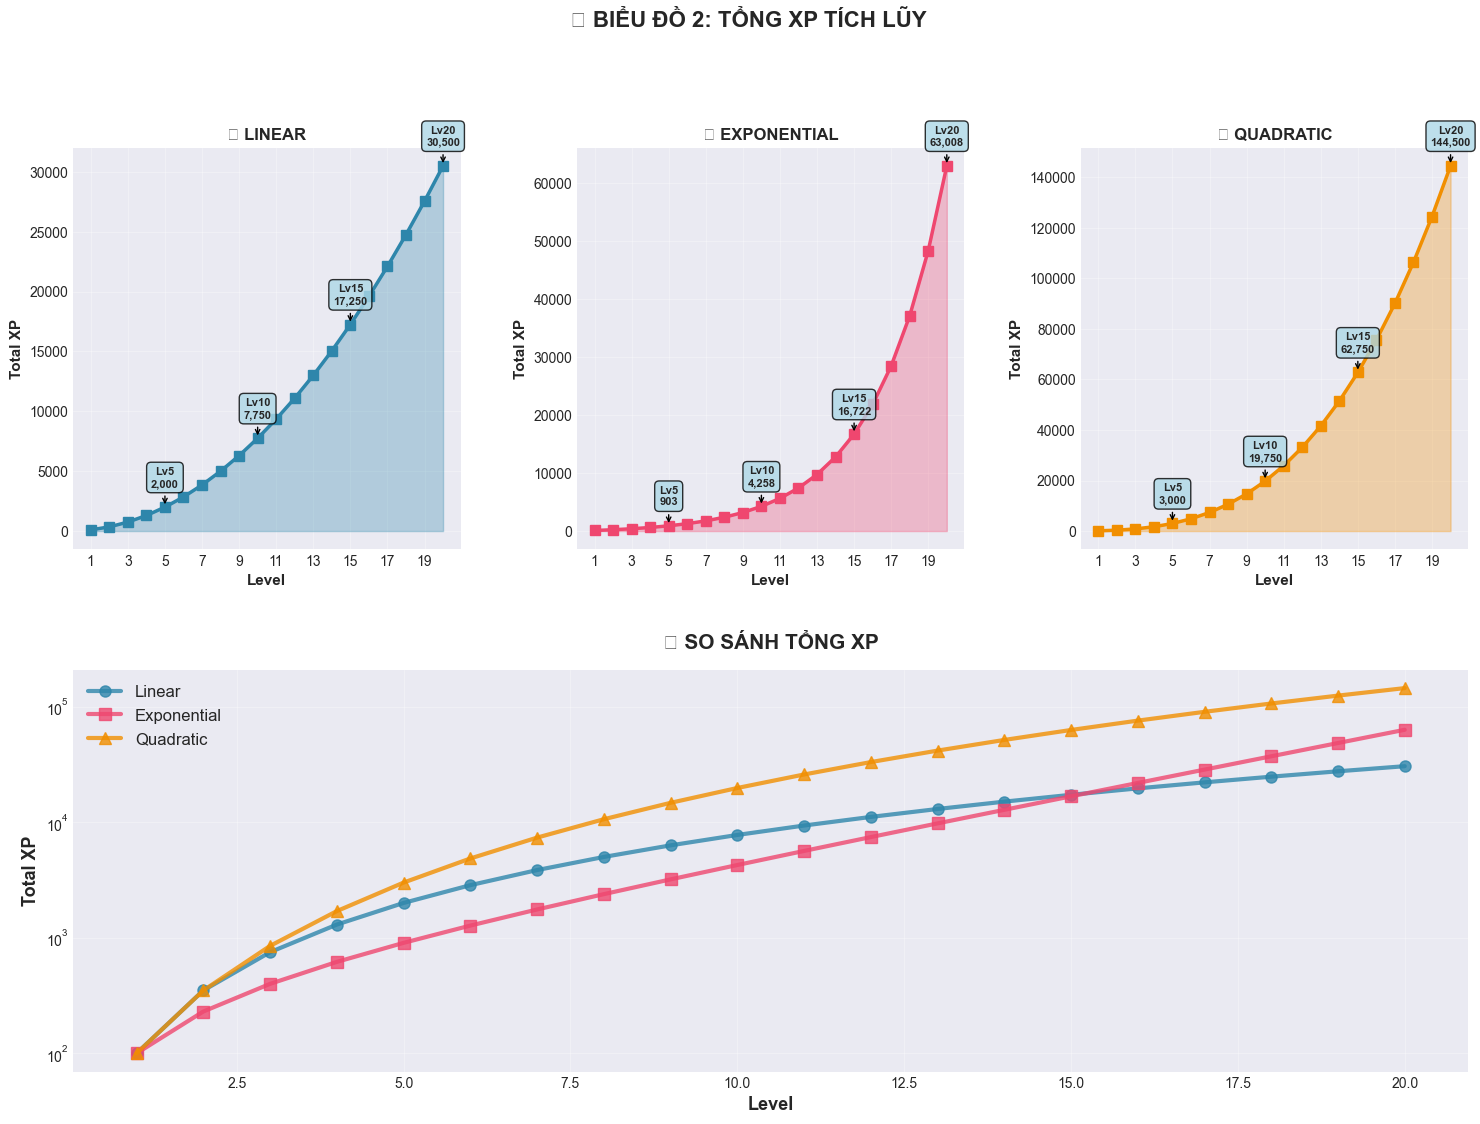

In [6]:
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

totals = [('LINEAR', total_linear, colors[0]), ('EXPONENTIAL', total_exp, colors[1]), ('QUADRATIC', total_quad, colors[2])]

for idx, (title, data, color) in enumerate(totals):
    ax = fig.add_subplot(gs[0, idx])
    ax.fill_between(levels, data, alpha=0.3, color=color)
    ax.plot(levels, data, marker='s', linewidth=2.5, markersize=7, color=color)
    
    for level in [5, 10, 15, 20]:
        i = level - 1
        ax.annotate(f'Lv{level}\n{data[i]:,.0f}', xy=(level, data[i]), xytext=(0, 15),
                   textcoords='offset points', ha='center', fontsize=8, fontweight='bold',
                   bbox=dict(boxstyle='round,pad=0.4', facecolor='lightblue', alpha=0.8),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
    
    ax.set_xlabel('Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('Total XP', fontsize=11, fontweight='bold')
    ax.set_title(f'📈 {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(1, 21, 2))

ax_compare = fig.add_subplot(gs[1, :])
ax_compare.plot(levels, total_linear, marker='o', linewidth=3, markersize=8, color=colors[0], label='Linear', alpha=0.8)
ax_compare.plot(levels, total_exp, marker='s', linewidth=3, markersize=8, color=colors[1], label='Exponential', alpha=0.8)
ax_compare.plot(levels, total_quad, marker='^', linewidth=3, markersize=8, color=colors[2], label='Quadratic', alpha=0.8)

ax_compare.set_xlabel('Level', fontsize=13, fontweight='bold')
ax_compare.set_ylabel('Total XP', fontsize=13, fontweight='bold')
ax_compare.set_title('📊 SO SÁNH TỔNG XP', fontsize=15, fontweight='bold', pad=15)
ax_compare.legend(fontsize=12, loc='upper left')
ax_compare.grid(True, alpha=0.3)
ax_compare.set_yscale('log')

plt.suptitle('🎮 BIỂU ĐỒ 2: TỔNG XP TÍCH LŨY', fontsize=16, fontweight='bold', y=0.995)
plt.show()


# 📊 BIỂU ĐỒ 3: Tỷ Lệ Tăng XP (%)

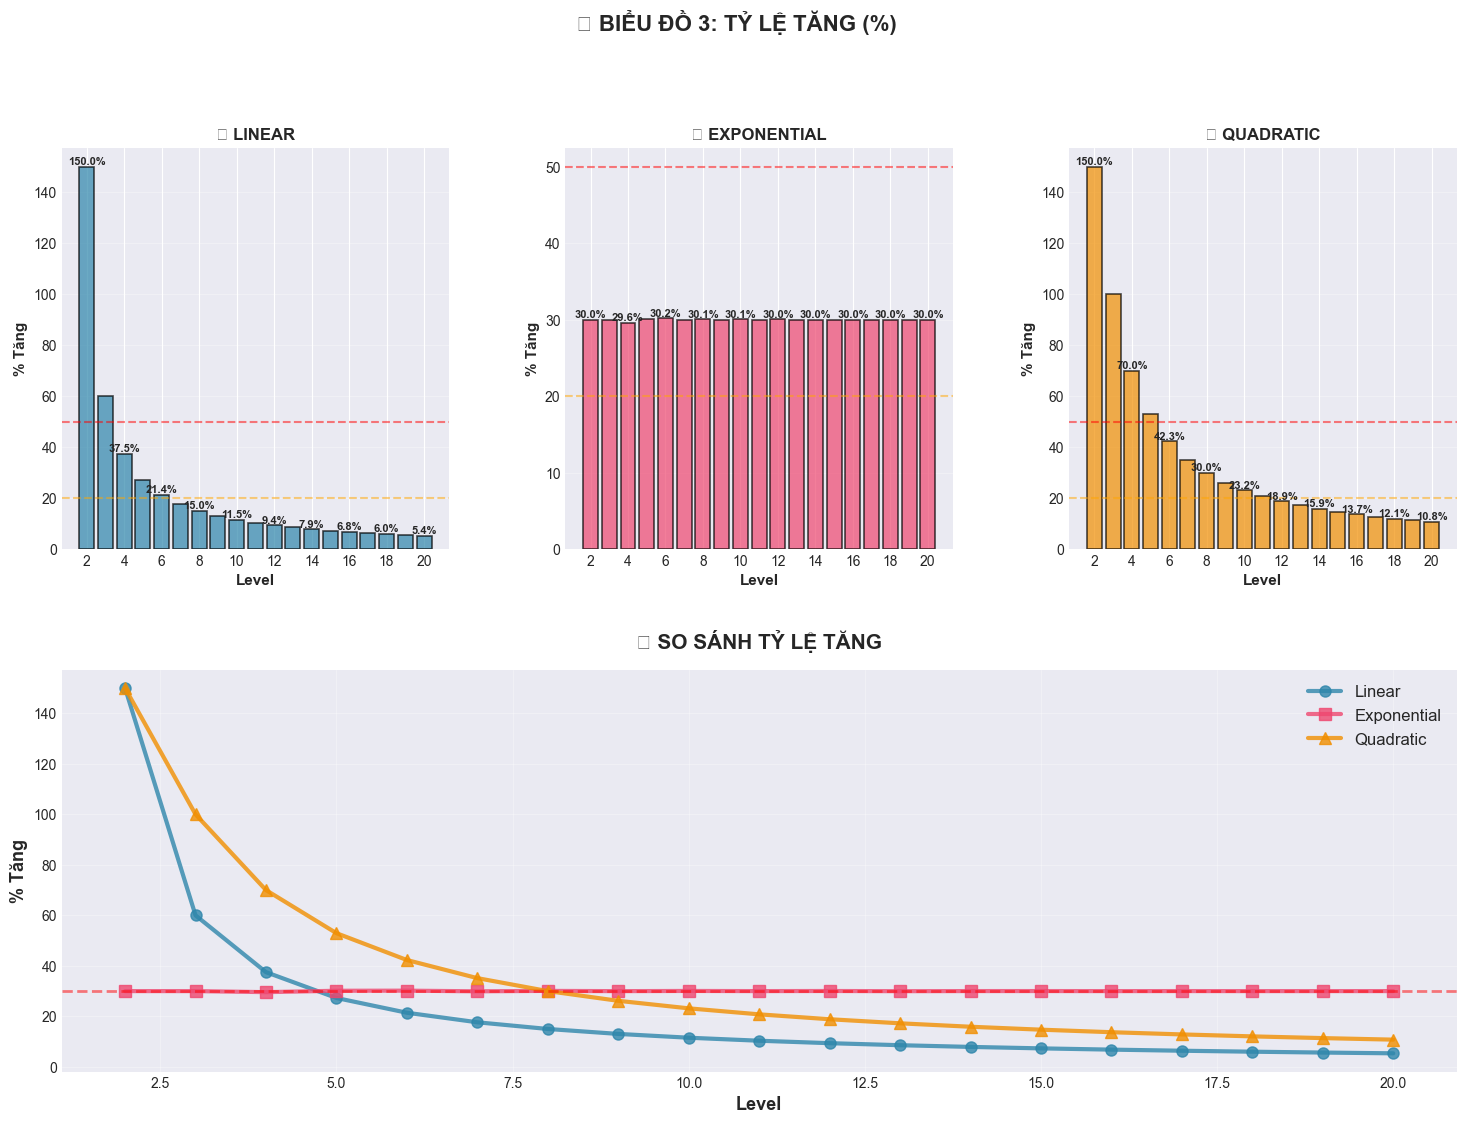

In [7]:
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

percents = [('LINEAR', percent_linear, colors[0]), ('EXPONENTIAL', percent_exp, colors[1]), ('QUADRATIC', percent_quad, colors[2])]

for idx, (title, data, color) in enumerate(percents):
    ax = fig.add_subplot(gs[0, idx])
    bars = ax.bar(levels[1:], data[1:], color=color, alpha=0.7, edgecolor='black', linewidth=1.2)
    
    for i, bar in enumerate(bars[::2]):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height, f'{height:.1f}%',
               ha='center', va='bottom', fontsize=8, fontweight='bold')
    
    ax.axhline(y=50, color='red', linestyle='--', linewidth=1.5, alpha=0.5)
    ax.axhline(y=20, color='orange', linestyle='--', linewidth=1.5, alpha=0.5)
    ax.set_xlabel('Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('% Tăng', fontsize=11, fontweight='bold')
    ax.set_title(f'📊 {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticks(range(2, 21, 2))

ax_compare = fig.add_subplot(gs[1, :])
ax_compare.plot(levels[1:], percent_linear[1:], marker='o', linewidth=3, markersize=8, color=colors[0], label='Linear', alpha=0.8)
ax_compare.plot(levels[1:], percent_exp[1:], marker='s', linewidth=3, markersize=8, color=colors[1], label='Exponential', alpha=0.8)
ax_compare.plot(levels[1:], percent_quad[1:], marker='^', linewidth=3, markersize=8, color=colors[2], label='Quadratic', alpha=0.8)
ax_compare.axhline(y=30, color='red', linestyle='--', linewidth=2, alpha=0.5)

ax_compare.set_xlabel('Level', fontsize=13, fontweight='bold')
ax_compare.set_ylabel('% Tăng', fontsize=13, fontweight='bold')
ax_compare.set_title('📈 SO SÁNH TỶ LỆ TĂNG', fontsize=15, fontweight='bold', pad=15)
ax_compare.legend(fontsize=12)
ax_compare.grid(True, alpha=0.3)

plt.suptitle('🎮 BIỂU ĐỒ 3: TỶ LỆ TĂNG (%)', fontsize=16, fontweight='bold', y=0.995)
plt.show()

# 📊 BIỂU ĐỒ 4: XP Tăng Thêm Mỗi Level

C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10133 (\N{HEAVY PLUS SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


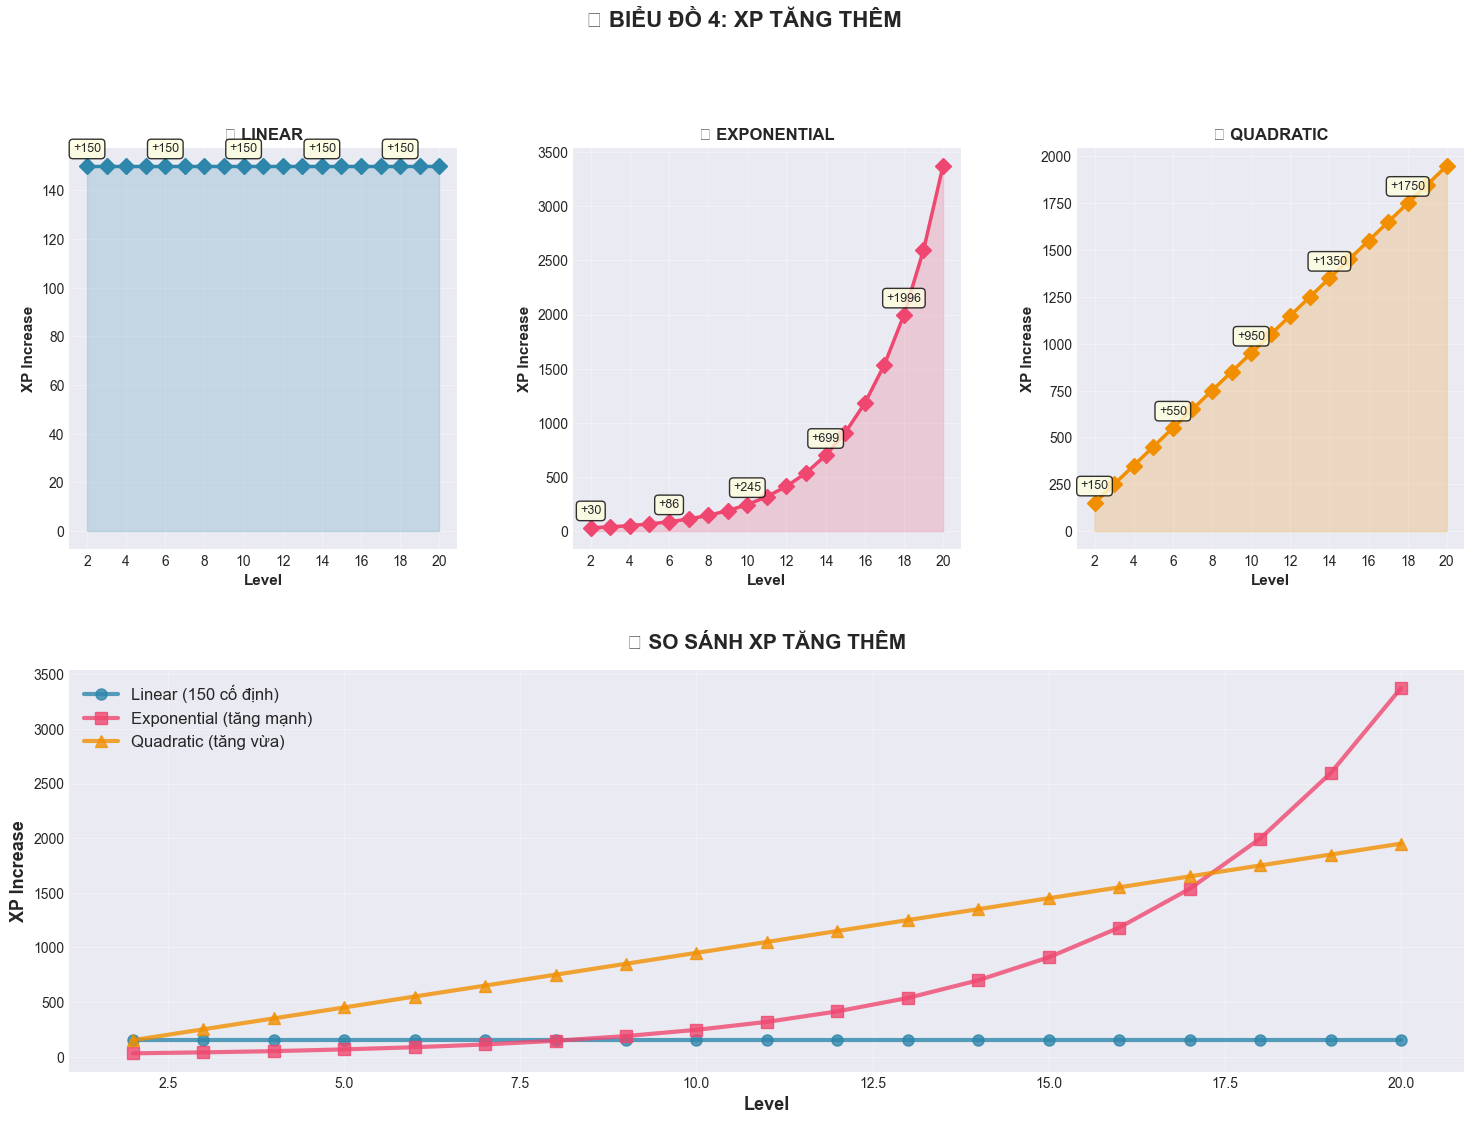

In [8]:
fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

increases = [('LINEAR', increase_linear, colors[0]), ('EXPONENTIAL', increase_exp, colors[1]), ('QUADRATIC', increase_quad, colors[2])]

for idx, (title, data, color) in enumerate(increases):
    ax = fig.add_subplot(gs[0, idx])
    ax.plot(levels[1:], data[1:], marker='D', linewidth=2.5, markersize=8, color=color)
    ax.fill_between(levels[1:], data[1:], alpha=0.2, color=color)
    
    for i in range(0, len(levels[1:]), 4):
        ax.annotate(f'+{int(data[1:][i])}', xy=(levels[1:][i], data[1:][i]), xytext=(0, 10),
                   textcoords='offset points', ha='center', fontsize=9,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='lightyellow', alpha=0.8))
    
    ax.set_xlabel('Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('XP Increase', fontsize=11, fontweight='bold')
    ax.set_title(f'➕ {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xticks(range(2, 21, 2))

ax_compare = fig.add_subplot(gs[1, :])
ax_compare.plot(levels[1:], increase_linear[1:], marker='o', linewidth=3, markersize=8, color=colors[0], label='Linear (150 cố định)', alpha=0.8)
ax_compare.plot(levels[1:], increase_exp[1:], marker='s', linewidth=3, markersize=8, color=colors[1], label='Exponential (tăng mạnh)', alpha=0.8)
ax_compare.plot(levels[1:], increase_quad[1:], marker='^', linewidth=3, markersize=8, color=colors[2], label='Quadratic (tăng vừa)', alpha=0.8)

ax_compare.set_xlabel('Level', fontsize=13, fontweight='bold')
ax_compare.set_ylabel('XP Increase', fontsize=13, fontweight='bold')
ax_compare.set_title('📊 SO SÁNH XP TĂNG THÊM', fontsize=15, fontweight='bold', pad=15)
ax_compare.legend(fontsize=12)
ax_compare.grid(True, alpha=0.3)

plt.suptitle('🎮 BIỂU ĐỒ 4: XP TĂNG THÊM', fontsize=16, fontweight='bold', y=0.995)
plt.show()


# 📊 BIỂU ĐỒ 5: Dashboard (3 Công Thức)

C:\Users\ntam3\AppData\Local\Temp\ipykernel_11428\1094886714.py:22: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()


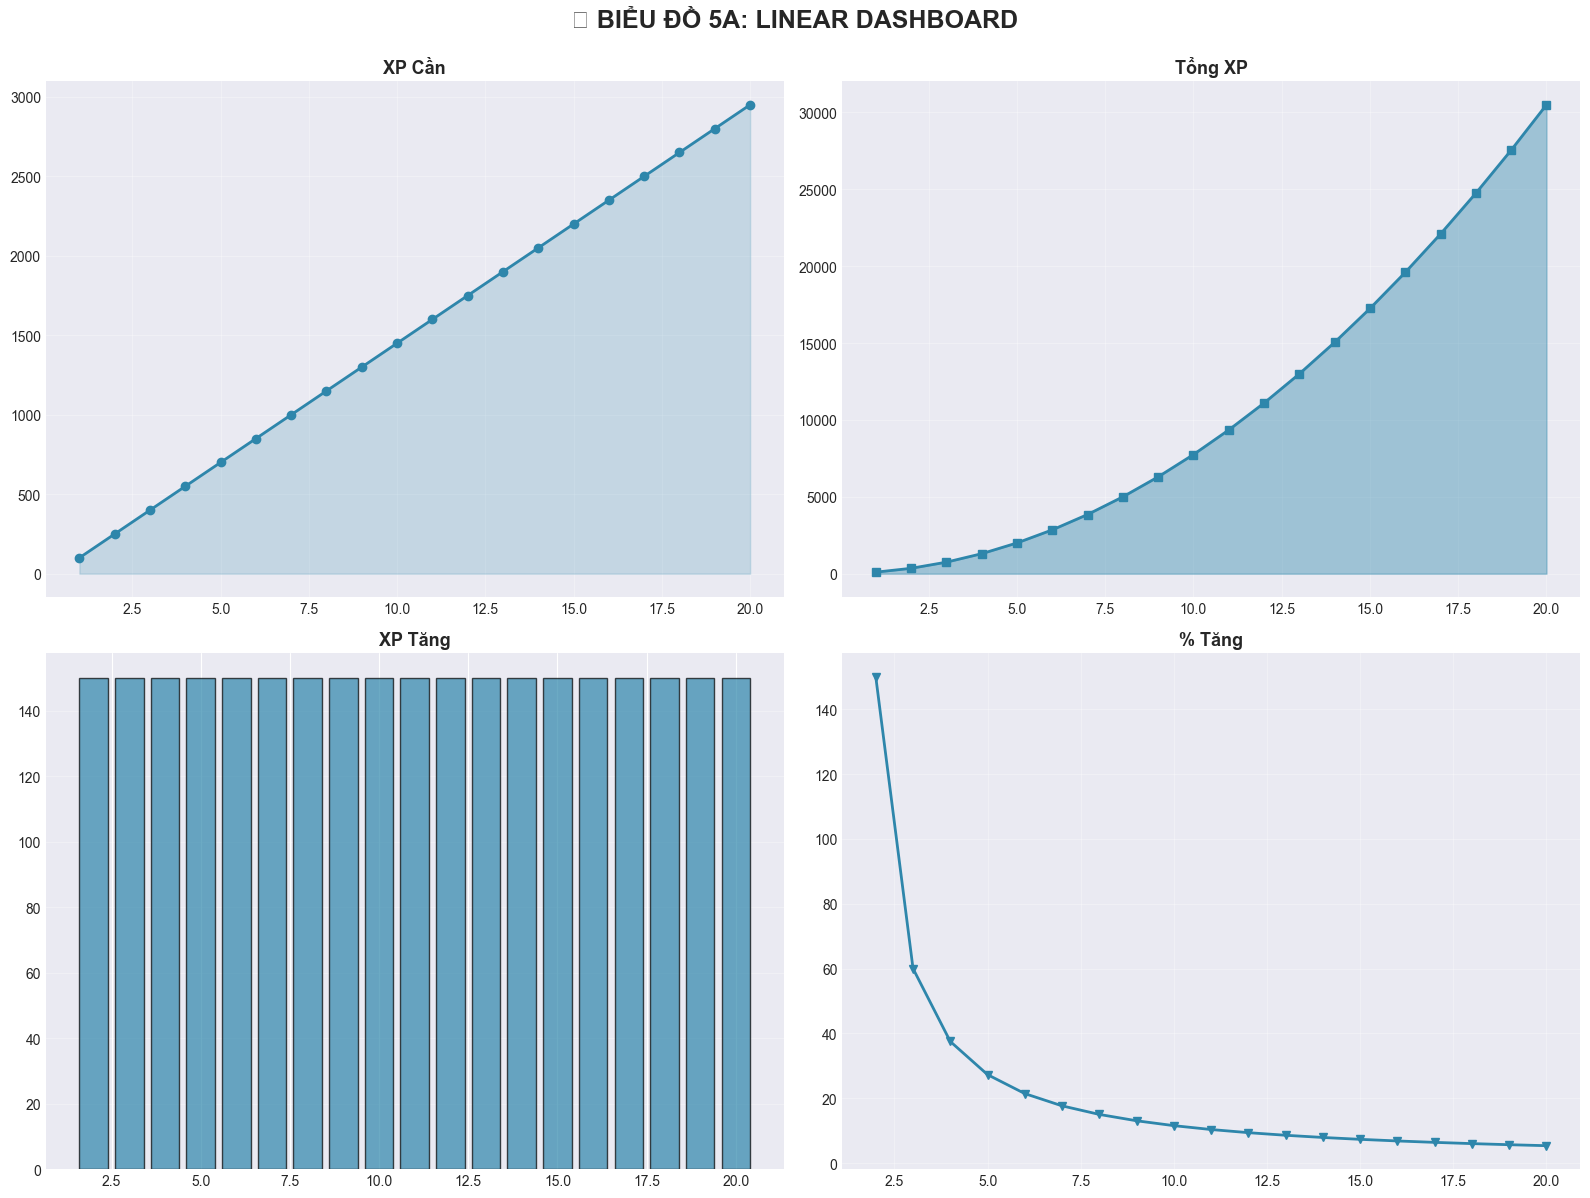

C:\Users\ntam3\AppData\Local\Temp\ipykernel_11428\1094886714.py:46: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()


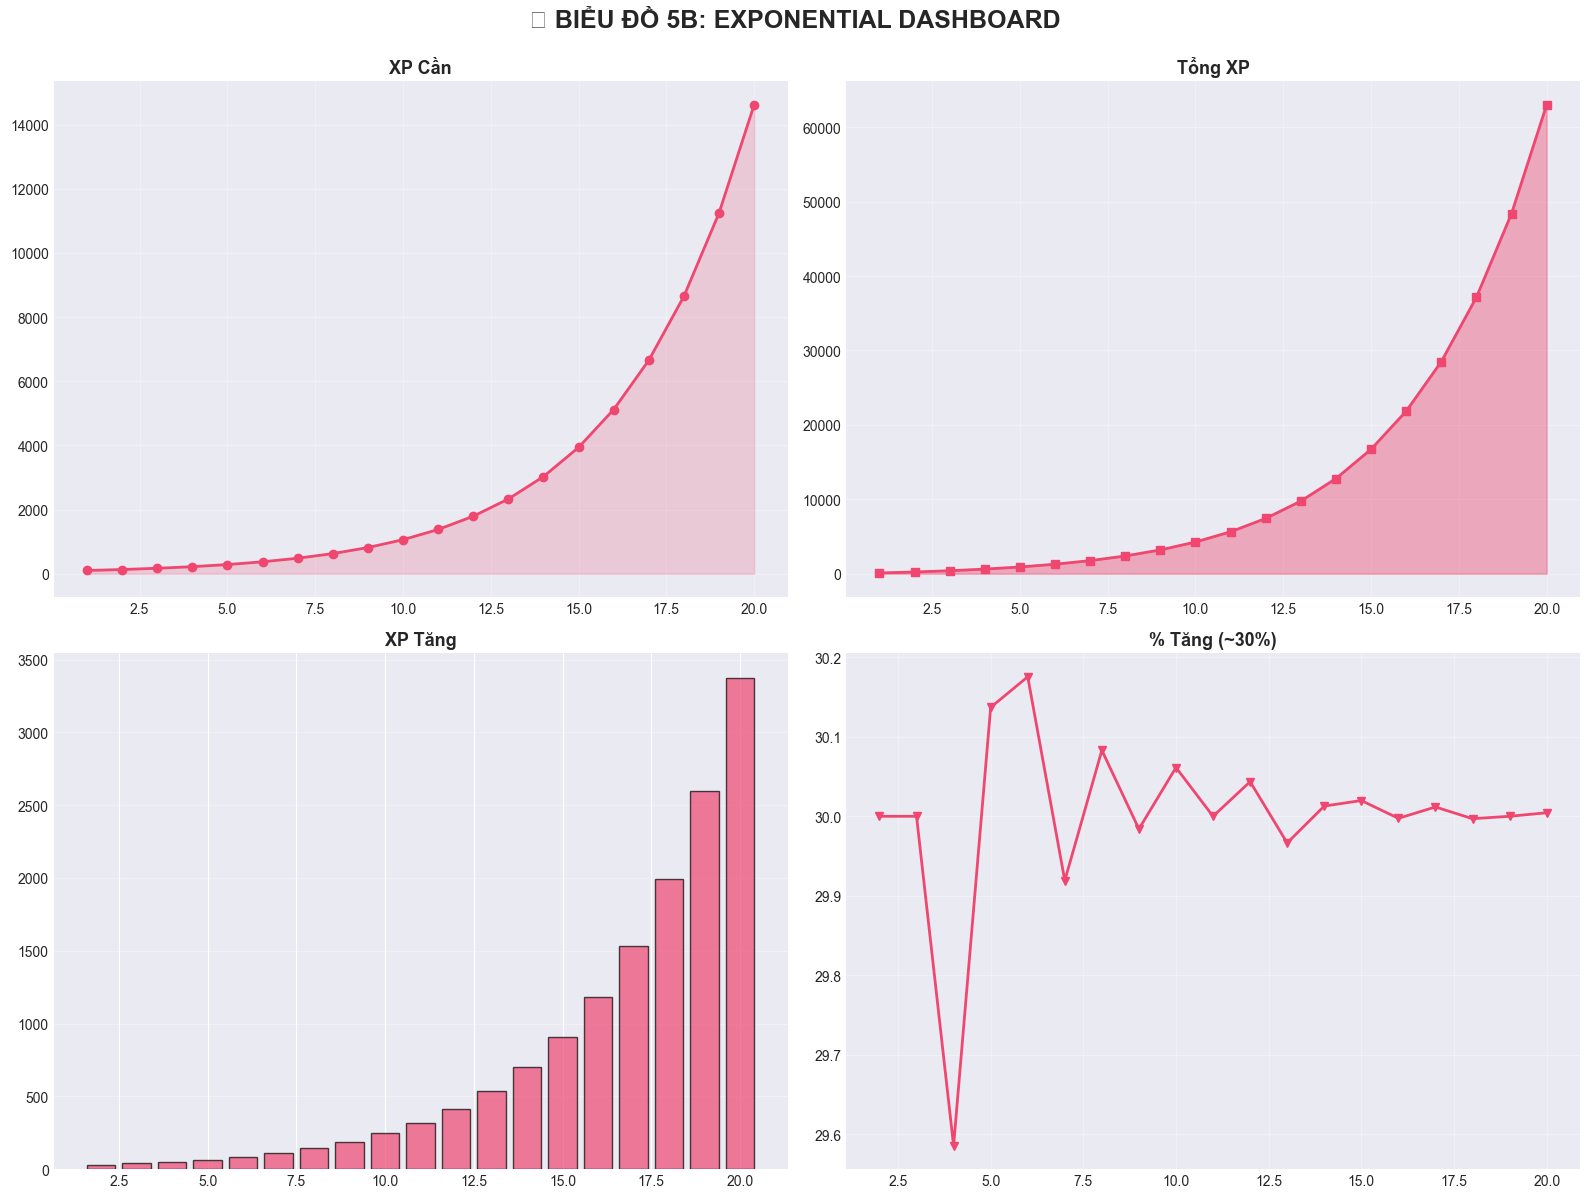

C:\Users\ntam3\AppData\Local\Temp\ipykernel_11428\1094886714.py:70: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) Arial.
  plt.tight_layout()


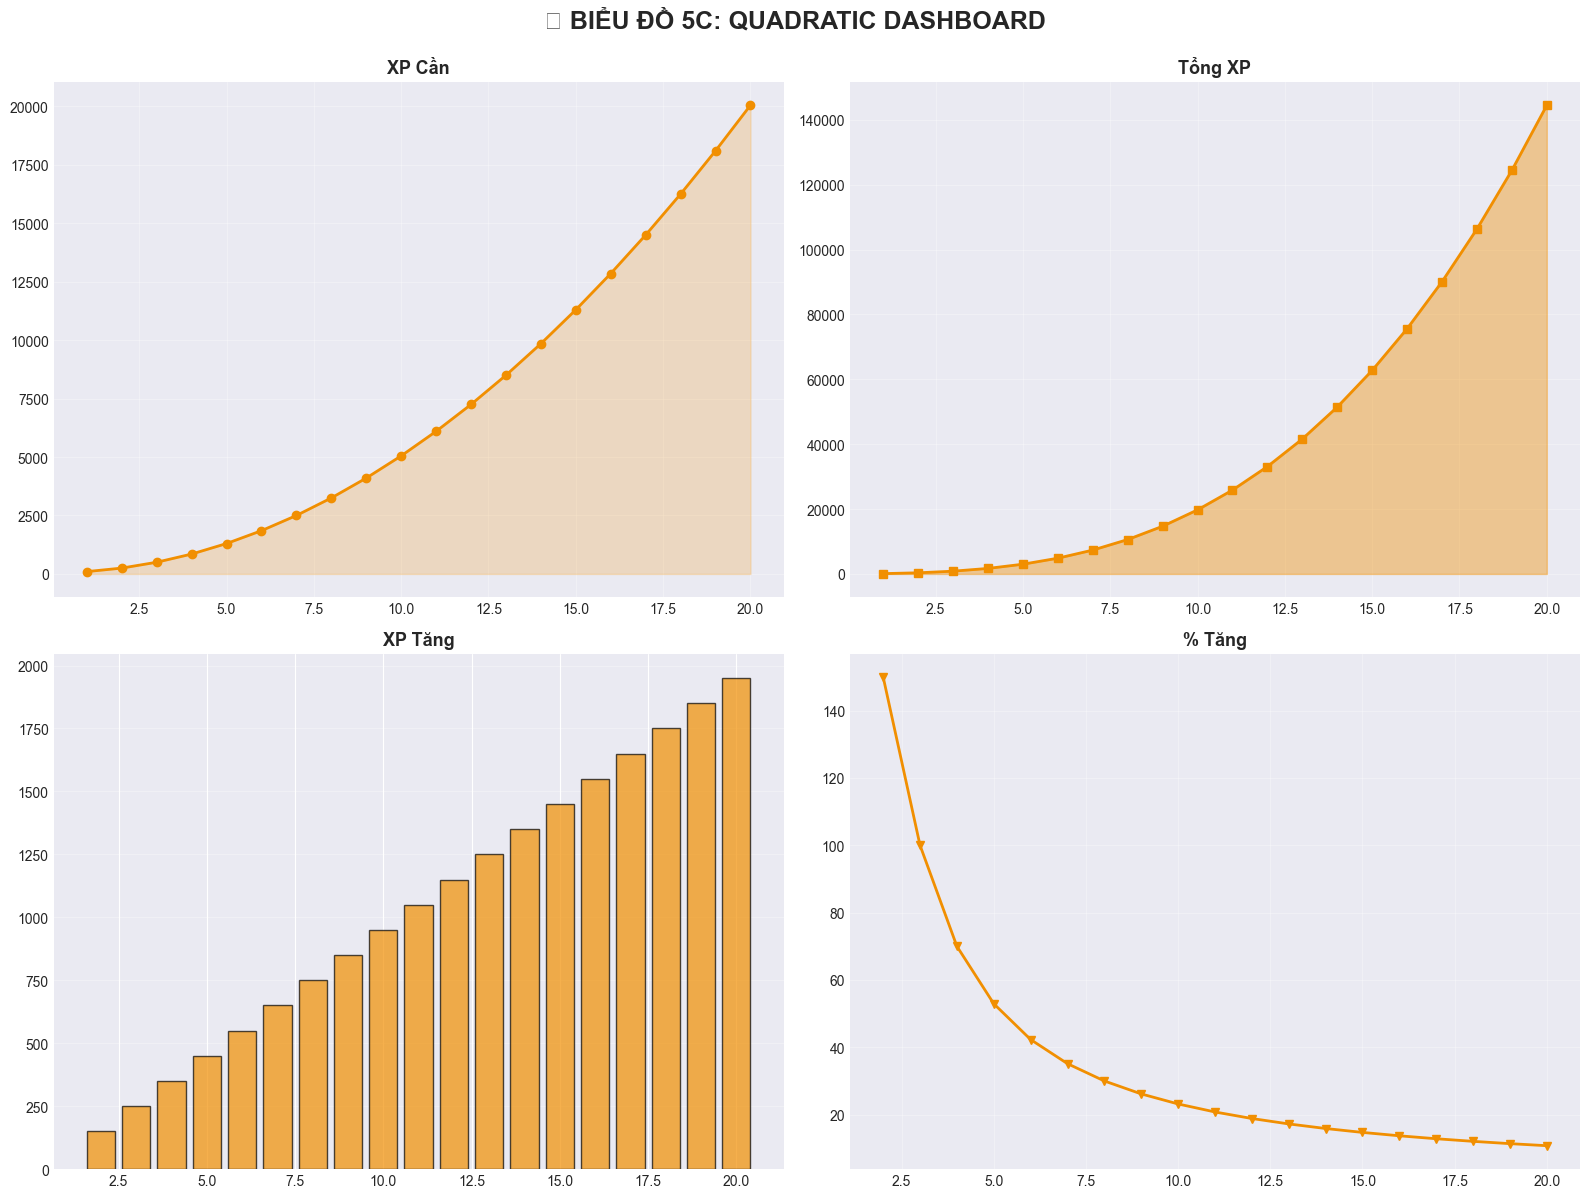

In [9]:
# LINEAR
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
ax1.plot(levels, xp_linear, marker='o', linewidth=2, markersize=6, color='#2E86AB')
ax1.fill_between(levels, xp_linear, alpha=0.2, color='#2E86AB')
ax1.set_title('XP Cần', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(levels, total_linear, marker='s', linewidth=2, markersize=6, color='#2E86AB')
ax2.fill_between(levels, total_linear, alpha=0.4, color='#2E86AB')
ax2.set_title('Tổng XP', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

ax3.bar(levels[1:], increase_linear[1:], color='#2E86AB', alpha=0.7, edgecolor='black')
ax3.set_title('XP Tăng', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

ax4.plot(levels[1:], percent_linear[1:], marker='v', linewidth=2, markersize=6, color='#2E86AB')
ax4.set_title('% Tăng', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.suptitle('🎯 BIỂU ĐỒ 5A: LINEAR DASHBOARD', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# EXPONENTIAL
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
ax1.plot(levels, xp_exp, marker='o', linewidth=2, markersize=6, color='#EF476F')
ax1.fill_between(levels, xp_exp, alpha=0.2, color='#EF476F')
ax1.set_title('XP Cần', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(levels, total_exp, marker='s', linewidth=2, markersize=6, color='#EF476F')
ax2.fill_between(levels, total_exp, alpha=0.4, color='#EF476F')
ax2.set_title('Tổng XP', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

ax3.bar(levels[1:], increase_exp[1:], color='#EF476F', alpha=0.7, edgecolor='black')
ax3.set_title('XP Tăng', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

ax4.plot(levels[1:], percent_exp[1:], marker='v', linewidth=2, markersize=6, color='#EF476F')
ax4.set_title('% Tăng (~30%)', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.suptitle('🎯 BIỂU ĐỒ 5B: EXPONENTIAL DASHBOARD', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# QUADRATIC
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
ax1.plot(levels, xp_quad, marker='o', linewidth=2, markersize=6, color='#F18F01')
ax1.fill_between(levels, xp_quad, alpha=0.2, color='#F18F01')
ax1.set_title('XP Cần', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

ax2.plot(levels, total_quad, marker='s', linewidth=2, markersize=6, color='#F18F01')
ax2.fill_between(levels, total_quad, alpha=0.4, color='#F18F01')
ax2.set_title('Tổng XP', fontsize=13, fontweight='bold')
ax2.grid(True, alpha=0.3)

ax3.bar(levels[1:], increase_quad[1:], color='#F18F01', alpha=0.7, edgecolor='black')
ax3.set_title('XP Tăng', fontsize=13, fontweight='bold')
ax3.grid(True, alpha=0.3, axis='y')

ax4.plot(levels[1:], percent_quad[1:], marker='v', linewidth=2, markersize=6, color='#F18F01')
ax4.set_title('% Tăng', fontsize=13, fontweight='bold')
ax4.grid(True, alpha=0.3)

plt.suptitle('🎯 BIỂU ĐỒ 5C: QUADRATIC DASHBOARD', fontsize=18, fontweight='bold', y=0.995)
plt.tight_layout()
plt.show()

# 📊 BIỂU ĐỒ 6: Thời Gian Dự Kiến (50 XP/ngày)

C:\Users\ntam3\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9200 (\N{ALARM CLOCK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


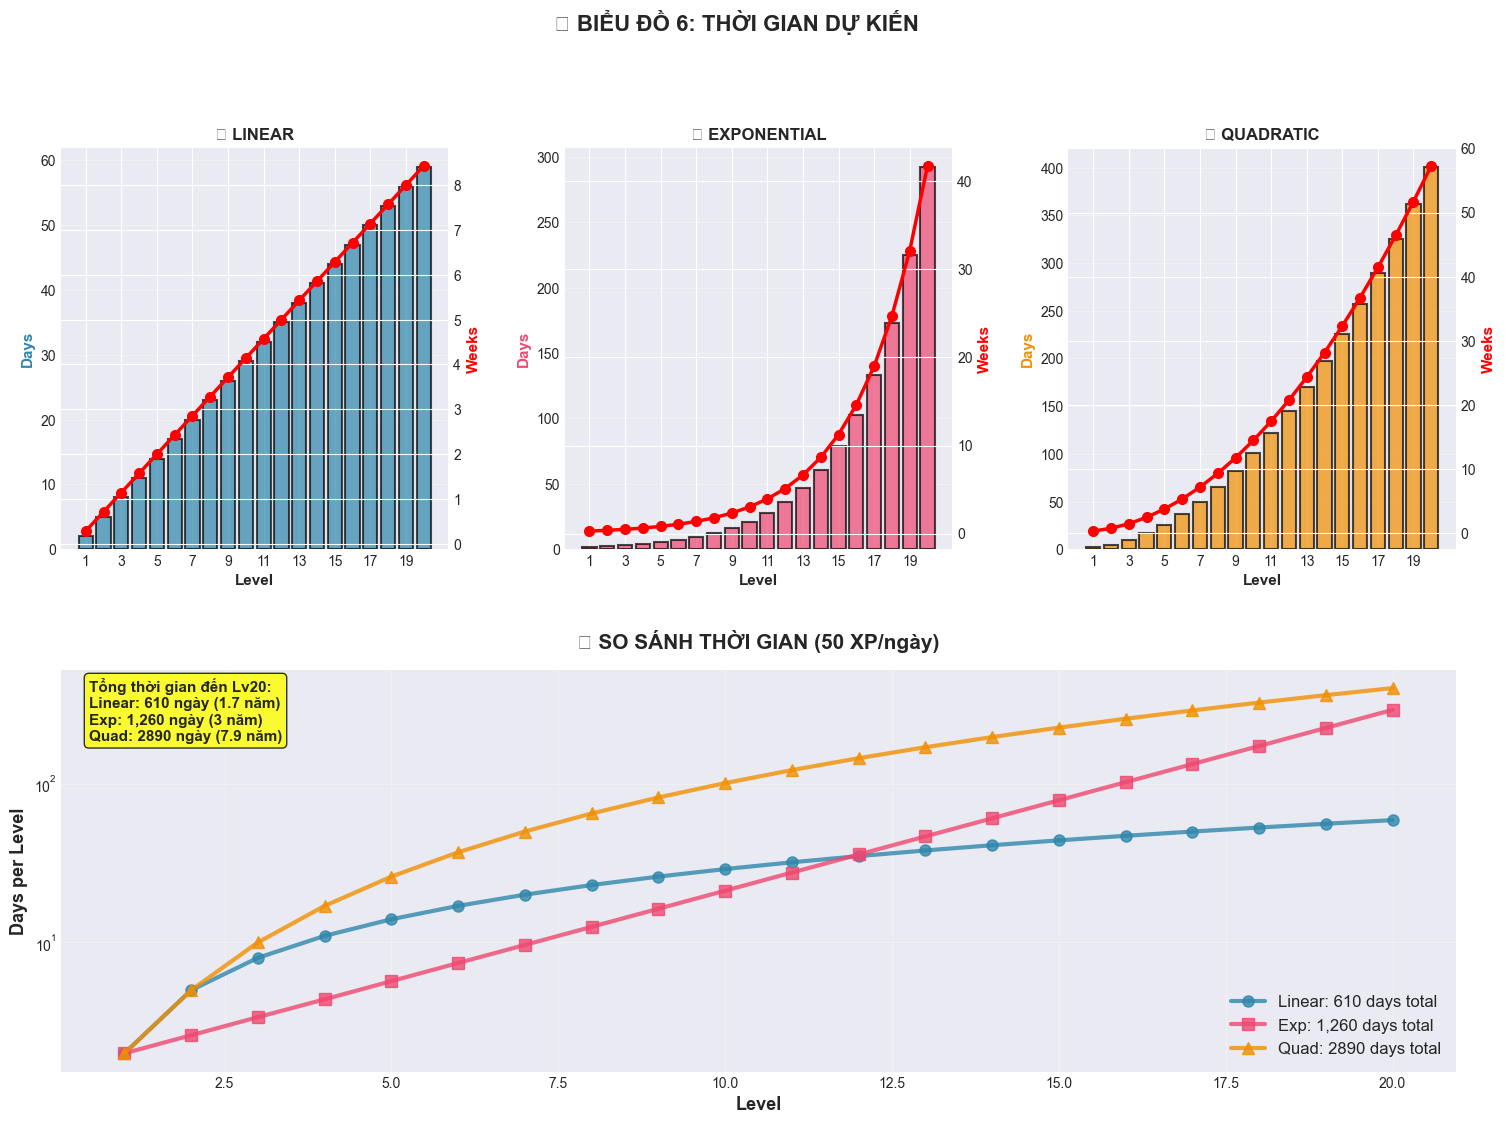

In [10]:
xp_per_day = 50
days_linear = xp_linear / xp_per_day
weeks_linear = days_linear / 7
days_exp = xp_exp / xp_per_day
weeks_exp = days_exp / 7
days_quad = xp_quad / xp_per_day
weeks_quad = days_quad / 7

fig = plt.figure(figsize=(18, 12))
gs = GridSpec(2, 3, figure=fig, hspace=0.3, wspace=0.3)

times = [('LINEAR', days_linear, weeks_linear, colors[0]), ('EXPONENTIAL', days_exp, weeks_exp, colors[1]), ('QUADRATIC', days_quad, weeks_quad, colors[2])]

for idx, (title, days, weeks, color) in enumerate(times):
    ax = fig.add_subplot(gs[0, idx])
    ax.bar(levels, days, color=color, alpha=0.7, edgecolor='black', linewidth=1.5)
    ax2 = ax.twinx()
    ax2.plot(levels, weeks, marker='o', linewidth=2.5, markersize=7, color='red', label='Weeks')
    ax.set_xlabel('Level', fontsize=11, fontweight='bold')
    ax.set_ylabel('Days', fontsize=11, fontweight='bold', color=color)
    ax2.set_ylabel('Weeks', fontsize=11, fontweight='bold', color='red')
    ax.set_title(f'⏰ {title}', fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_xticks(range(1, 21, 2))

ax_compare = fig.add_subplot(gs[1, :])
ax_compare.plot(levels, days_linear, marker='o', linewidth=3, markersize=8, color=colors[0], 
               label=f'Linear: {total_linear[-1]/xp_per_day:.0f} days total', alpha=0.8)
ax_compare.plot(levels, days_exp, marker='s', linewidth=3, markersize=8, color=colors[1],
               label=f'Exp: {total_exp[-1]/xp_per_day:,.0f} days total', alpha=0.8)
ax_compare.plot(levels, days_quad, marker='^', linewidth=3, markersize=8, color=colors[2],
               label=f'Quad: {total_quad[-1]/xp_per_day:.0f} days total', alpha=0.8)

ax_compare.set_xlabel('Level', fontsize=13, fontweight='bold')
ax_compare.set_ylabel('Days per Level', fontsize=13, fontweight='bold')
ax_compare.set_title('📊 SO SÁNH THỜI GIAN (50 XP/ngày)', fontsize=15, fontweight='bold', pad=15)
ax_compare.legend(fontsize=12)
ax_compare.grid(True, alpha=0.3)
ax_compare.set_yscale('log')

textstr = f'Tổng thời gian đến Lv20:\nLinear: {total_linear[-1]/xp_per_day:.0f} ngày ({total_linear[-1]/xp_per_day/365:.1f} năm)\nExp: {total_exp[-1]/xp_per_day:,.0f} ngày ({total_exp[-1]/xp_per_day/365:.0f} năm)\nQuad: {total_quad[-1]/xp_per_day:.0f} ngày ({total_quad[-1]/xp_per_day/365:.1f} năm)'
props = dict(boxstyle='round', facecolor='yellow', alpha=0.8)
ax_compare.text(0.02, 0.98, textstr, transform=ax_compare.transAxes, fontsize=11,
               verticalalignment='top', bbox=props, fontweight='bold')

plt.suptitle('🎮 BIỂU ĐỒ 6: THỜI GIAN DỰ KIẾN', fontsize=16, fontweight='bold', y=0.995)
plt.show()


# 🎯 Kết Luận
**So sánh 3 công thức:**

**Linear (150L-50):** Đơn giản, dễ đoán, phù hợp casual games

**Exponential (100×1.3^L):** Khó nhất, phù hợp hardcore/competitive games  

**Quadratic (50L²+50):** Cân bằng giữa 2 loại trên